Installing Dependencies

In [ ]:
!pip install torch torchvision opencv-python numpy matplotlib pillow

Cloning FAR

In [ ]:
!git clone https://github.com/crockwell/far.git
%cd far

Cloning into 'far'...
remote: Enumerating objects: 262, done.
remote: Counting objects: 100% (262/262), done.
remote: Compressing objects: 100% (200/200), done.
remote: Total 262 (delta 63), reused 229 (delta 46), pack-reused 0 (from 0)
Receiving objects: 100% (262/262), 1.45 MiB | 17.41 MiB/s, done.
Resolving deltas: 100% (63/63), done.
/content/far


In [ ]:
%cd /content/far/mapfree_6dreg
!wget https://fouheylab.eecs.umich.edu/~cnris/far/model_checkpoints/mapfree_6dreg/pretrained_models.zip --no-check-certificate
!unzip pretrained_models.zip

/content/far/mapfree_6dreg
--2025-12-09 00:30:58--  https://fouheylab.eecs.umich.edu/~cnris/far/model_checkpoints/mapfree_6dreg/pretrained_models.zip
Resolving fouheylab.eecs.umich.edu (fouheylab.eecs.umich.edu)... 141.212.115.140
Connecting to fouheylab.eecs.umich.edu (fouheylab.eecs.umich.edu)|141.212.115.140|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 1284413445 (1.2G) [application/zip]
Saving to: ‘pretrained_models.zip’

pretrained_models.z 100%[===================>]   1.20G  12.3MB/s    in 1m 58s  

2025-12-09 00:32:58 (10.4 MB/s) - ‘pretrained_models.zip’ saved [1284413445/1284413445]

Archive:  pretrained_models.zip
   creating: pretrained_models/
  inflating: pretrained_models/far_loftr.ckpt  
  inflating: pretrained_models/far_superglue.ckpt  


Downloading LoFTR weights

In [ ]:
!pip install gdown;
!gdown https://drive.google.com/drive/folders/1xu2Pq6mZT5hmFgiYMBT9Zt8h1yO-3SIp -O etc/feature_matching_baselines/LoFTR/weights --folder

Retrieving folder contents
Processing file 19s3QvcCWQ6g-N1PrYlDCg-2mOJZ3kkgS indoor_ds_new.ckpt
Processing file 1kW2bQejjMlmE7FGberHrubXpE_ttX2LB indoor_ot.ckpt
Processing file 1M-VD35-qdB5Iw-AtbDBCKC7hPolFW9UY outdoor_ds.ckpt
Processing file 1p2lxEyQm4ykJXsSKgiJ6pGf9WxyqWOnC outdoor_ot.ckpt
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=19s3QvcCWQ6g-N1PrYlDCg-2mOJZ3kkgS
From (redirected): https://drive.google.com/uc?id=19s3QvcCWQ6g-N1PrYlDCg-2mOJZ3kkgS&confirm=t&uuid=a42ffa21-0f28-4150-8cfe-a8768c0f7af3
To: /content/far/mapfree_6dreg/etc/feature_matching_baselines/LoFTR/weights/indoor_ds_new.ckpt
100% 46.4M/46.4M [00:00<00:00, 87.4MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1kW2bQejjMlmE7FGberHrubXpE_ttX2LB
From (redirected): https://drive.google.com/uc?id=1kW2bQejjMlmE7FGberHrubXpE_ttX2LB&confirm=t&uuid=8135d227-0932-4658-873f-a2f07108fa0d


Loading Images

In [ ]:
import cv2

# Load original images
imgA = cv2.imread("/content/imgA.JPG")
imgB = cv2.imread("/content/imgB.JPG")

# Resize to 540x720 (H, W)
resA = cv2.resize(imgA, (720, 540))
resB = cv2.resize(imgB, (720, 540))

# Save resized versions
cv2.imwrite("/content/far/imgA_540x720.jpg", resA)
cv2.imwrite("/content/far/imgB_540x720.jpg", resB)

print("Images resized to 540x720 successfully!")


Images resized to 540x720 successfully!


Installing FAR Dependencies

In [ ]:
!pip install yacs loguru einops scikit-image
!pip install pytorch-lightning
!pip install kornia timm tensorboard

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.6/61.6 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.5/849.5 kB 52.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 74.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 118.4 MB/s eta 0:00:00


Checking GPU

In [ ]:
import os
import cv2
import torch

# Check if CUDA is available
if torch.cuda.is_available():
    print("CUDA (GPU) is available and being used.")
    # Print the name of the used GPU
    print("GPU Name:", torch.cuda.get_device_name(0))
else:
    print("CUDA is not available. Using CPU.")

CUDA (GPU) is available and being used.
GPU Name: Tesla T4


In [ ]:
%cd /content/far/mapfree_6dreg

/content/far/mapfree_6dreg


In [ ]:
!ls /content
!ls /content/far
!find /content/far -name "LoFTR"
!find /content/far -name "src"
!ls /content/far/etc
!ls /content/far/mapfree_6dreg/etc/feature_matching_baselines
!ls /content/far/mapfree_6dreg/etc/feature_matching_baselines/LoFTR
!ls /content/far/etc/feature_matching_baselines/LoFTR/src

far  imgA.JPG  imgB.JPG  sample_data
environment_pytorch_v1.yml  imgA_540x720.jpg		   mapfree_6dreg
environment.yml		    imgB_540x720.jpg		   mp3d_loftr
far_thumbnail.png	    interiornetStreetlearn_8ptVit  README.md
/content/far/mapfree_6dreg/etc/feature_matching_baselines/LoFTR
/content/far/interiornetStreetlearn_8ptVit/src
/content/far/mp3d_loftr/src
ls: cannot access '/content/far/etc': No such file or directory
compute.py  LoFTR  matchers.py	SuperGlue  utils.py
weights
ls: cannot access '/content/far/etc/feature_matching_baselines/LoFTR/src': No such file or directory


In [ ]:
!rm -rf LoFTR
!git clone https://github.com/zju3dv/LoFTR.git


Cloning into 'LoFTR'...
remote: Enumerating objects: 416, done.
remote: Total 416 (delta 0), reused 0 (delta 0), pack-reused 416 (from 1)
Receiving objects: 100% (416/416), 30.81 MiB | 11.18 MiB/s, done.
Resolving deltas: 100% (159/159), done.


In [ ]:
!cp -r LoFTR/src /content/far/mapfree_6dreg/etc/feature_matching_baselines/LoFTR/
os.listdir('/content/far/mapfree_6dreg/etc/feature_matching_baselines/LoFTR/src')

['optimizers',
 'losses',
 'loftr',
 '__init__.py',
 'config',
 'datasets',
 'lightning',
 'utils']

In [ ]:
!git clone https://github.com/magicleap/SuperGluePretrainedNetwork.git

Cloning into 'SuperGluePretrainedNetwork'...
remote: Enumerating objects: 185, done.
remote: Counting objects: 100% (1/1), done.
remote: Total 185 (delta 0), reused 0 (delta 0), pack-reused 184 (from 2)
Receiving objects: 100% (185/185), 118.85 MiB | 14.40 MiB/s, done.
Resolving deltas: 100% (52/52), done.


In [ ]:
!mkdir -p /content/far/mapfree_6dreg/etc/feature_matching_baselines/SuperGlue/
!cp -r SuperGluePretrainedNetwork/models /content/far/mapfree_6dreg/etc/feature_matching_baselines/SuperGlue/

In [ ]:
os.listdir('/content/far/mapfree_6dreg/etc/feature_matching_baselines/SuperGlue/models')

['superpoint.py',
 'matching.py',
 'weights',
 '__init__.py',
 'superglue.py',
 'utils.py']

In [ ]:
os.listdir('/content/far/mapfree_6dreg/config')
os.listdir("/content/far/mapfree_6dreg/config/regression")
os.listdir("/content/far/mapfree_6dreg/config/regression/mapfree")


['3d3d.yaml',
 '3d3d_lowoverlap.yaml',
 '3d3d_weighted_loss.yaml',
 'rotquat_trans.yaml',
 'rotbin_transdirectionbin_scale_qkv.yaml',
 'rotquat_transdirection_scale.yaml',
 'rotbin_transdirectionbin_scale_lowoverlap.yaml',
 'rotbin_transdirectionbin_scale.yaml',
 '3d3d_no_warping.yaml',
 '3d3d_no_posencoder.yaml',
 'rot6d_trans.yaml',
 'rotbin_trans.yaml',
 'rot6d_trans_with_loftr.yaml']

In [ ]:
import torch
torch.cuda.is_available = lambda : False
device = torch.device('cpu')


In [ ]:
import os
os.listdir()
os.listdir('pretrained_models')

['far_loftr.ckpt', 'far_superglue.ckpt']

In [ ]:
!python demo.py -h


usage: demo.py [-h] [--checkpoint CHECKPOINT] [--img_path0 IMG_PATH0]
               [--img_path1 IMG_PATH1] [--k0 K0 [K0 ...]] [--k1 K1 [K1 ...]]
               config

positional arguments:
  config                path to config file

options:
  -h, --help            show this help message and exit
  --checkpoint CHECKPOINT
                        path to model checkpoint
  --img_path0 IMG_PATH0
                        img path 0
  --img_path1 IMG_PATH1
                        img path 1
  --k0 K0 [K0 ...]
  --k1 K1 [K1 ...]


Getting R and t

In [ ]:
%cd /content/far/mapfree_6dreg

!python demo.py \
  /content/far/mapfree_6dreg/config/regression/mapfree/rot6d_trans_with_loftr.yaml \
  --checkpoint pretrained_models/far_loftr.ckpt \
  --img_path0 ../imgA_540x720.jpg \
  --img_path1 ../imgB_540x720.jpg \
  --k0 700 700 360 270 \
  --k1 700 700 360 270

/content/far/mapfree_6dreg
/usr/local/lib/python3.12/dist-packages/torch/nn/modules/transformer.py:392: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torch/functional.py:505: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4317.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
/content/far/mapfree_6dreg/third_party/prior_ransac
[[ 0.9479  0.0203 -0.3179  0.1005]
 [-0.0077  0.9991  0.0408 -0.0042]
 [ 0.3185 -0.0362  0.9472  0.0586]]


Compute Homography

In [ ]:
import numpy as np

R = np.array([
    [ 0.9479,  0.0203, -0.3179],
    [-0.0077,  0.9991,  0.0408],
    [ 0.3185, -0.0362,  0.9472]
])

K = np.array([
    [700,   0, 360],
    [  0, 700, 270],
    [  0,   0,   1]
])

# Compute homography
H = K @ R @ np.linalg.inv(K)
print("Homography H =\n", H)


Homography H =
 [[ 1.11170000e+00  1.68285714e-03 -2.82204371e+02]
 [ 1.15150000e-01  9.85137143e-01 -2.31370286e+01]
 [ 4.55000000e-04 -5.17142857e-05  7.97362857e-01]]


Warp image B using Homography

In [ ]:
hA, wA = imgA.shape[:2]
hB, wB = imgB.shape[:2]

# Warp B using H
warpB = cv2.warpPerspective(imgB, H, (wA + wB, max(hA, hB)))

Computing shift

In [ ]:
# corners of image B
cornersB = np.array([
    [0, 0],
    [wB, 0],
    [wB, hB],
    [0, hB]
], dtype=np.float32)

# warp corners
cornersB_h = cv2.perspectiveTransform(cornersB.reshape(-1,1,2), H).reshape(-1,2)

# include A’s corners too
cornersA = np.array([
    [0,0], [wA,0], [wA,hA], [0,hA]
], dtype=np.float32)

all_corners = np.vstack([cornersA, cornersB_h])

xmin = int(np.floor(all_corners[:,0].min()))
ymin = int(np.floor(all_corners[:,1].min()))
xmax = int(np.ceil(all_corners[:,0].max()))
ymax = int(np.ceil(all_corners[:,1].max()))


In [ ]:
shiftX = -xmin
shiftY = -ymin

# shift matrix
T = np.array([
    [1, 0, shiftX],
    [0, 1, shiftY],
    [0, 0, 1]
], dtype=np.float32)

# apply shift
warpB_shifted = cv2.warpPerspective(imgB, T @ H, (xmax - xmin, ymax - ymin))

In [ ]:
canvas = np.zeros((ymax - ymin, xmax - xmin, 3), dtype=np.uint8)
canvas[shiftY:shiftY+hA, shiftX:shiftX+wA] = imgA

Blending

In [ ]:
A_canvas = canvas.copy()
B_canvas = warpB_shifted.copy()

# binary masks
maskA = (cv2.cvtColor(A_canvas, cv2.COLOR_BGR2GRAY) > 0)
maskB = (cv2.cvtColor(B_canvas, cv2.COLOR_BGR2GRAY) > 0)

result = np.zeros_like(A_canvas, dtype=np.float32)

# A only
result[maskA & ~maskB] = A_canvas[maskA & ~maskB]

# B only
result[maskB & ~maskA] = B_canvas[maskB & ~maskA]

# overlap → blend 50/50
result[maskA & maskB] = 0.5*A_canvas[maskA & maskB] + 0.5*B_canvas[maskA & maskB]

result = np.clip(result, 0, 255).astype(np.uint8)


Output Image

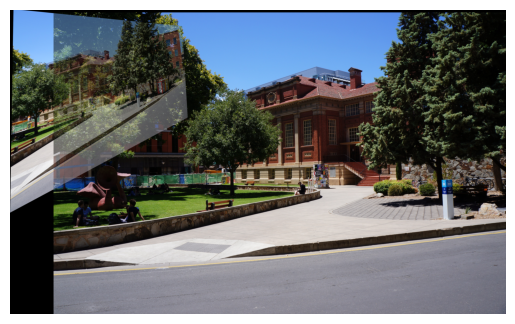

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(result[...,::-1])
plt.axis('off')
plt.show()